In [456]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

import numpy as np

import lal
import lalsimulation as lalsim

# from scrinet.interfaces import lalutils, rotations 
from wispy import lalutils, rotations 

In [457]:
import phenom

In [468]:
import data_generation_coprec

In [469]:
data_generation_coprec.polar_to_cart(0.87110269, 2.87848483, 2.6875922)

(-0.20360828407528178, 0.09936055212732288, -0.8411248681748204)

In [470]:
data_generation_coprec.polar_to_cart(0.76814664, 2.12305006, 2.38566647)

(-0.4758432263036042, 0.4485904447917963, -0.4029753061488568)

In [480]:
# q, S1x, S1y, S1z, S2x, S2y, S2z = [3.91576265, -0.20360828407528178, 0.09936055212732288, -0.8411248681748204,  -0.4758432263036042, 0.4485904447917963, -0.4029753061488568]
q, S1x, S1y, S1z, S2x, S2y, S2z = map(float, [8, 0.1, 0, 0.9,  0, 0, 0.])

In [481]:
q

8.0

In [482]:
# m1, m2 = phenom.m1_m2_M_q(100, 8)
m1, m2 = phenom.m1_m2_M_q(100, q)

{'m1': 88.88888888888889, 'm2': 11.11111111111111, 'S1x': 0.1, 'S1y': 0.0, 'S1z': 0.9, 'S2x': 0.0, 'S2y': 0.0, 'S2z': 0.0, 'phiRef': 1.2, 'r': 1, 'deltaT': 0.000244140625, 'f_min': 12, 'f_ref': 12, 'LALpars': None, 'lmax': 2, 'approximant': 51}
0.0698393479107974 1.2246467991473532e-16 -0.0


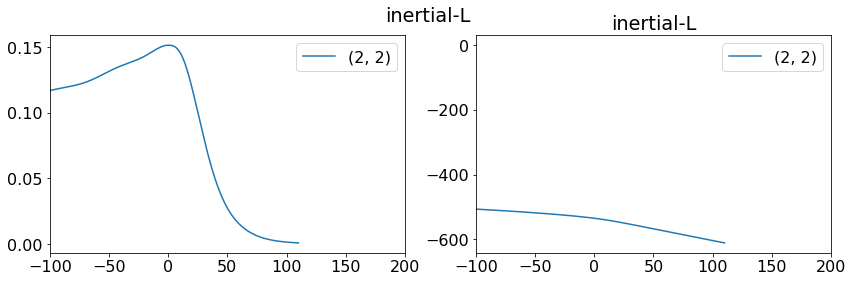

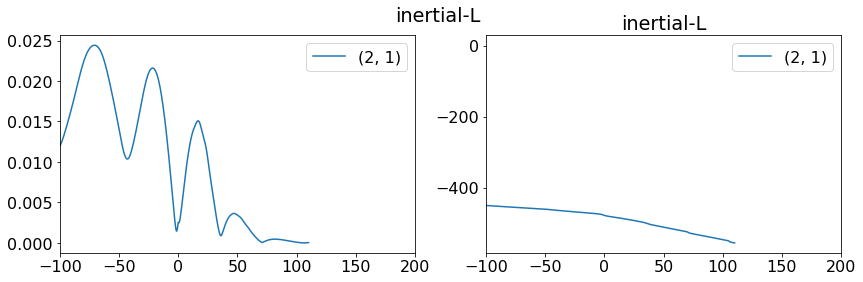

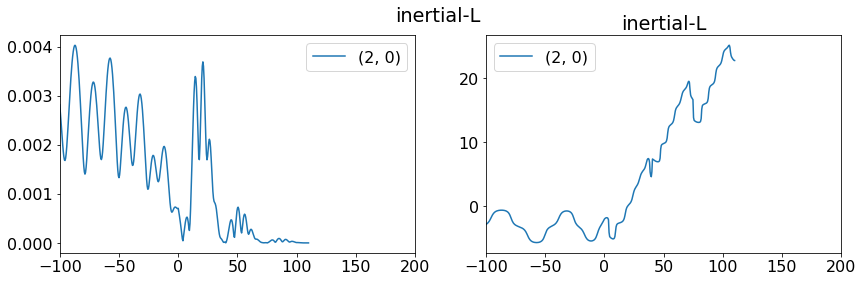

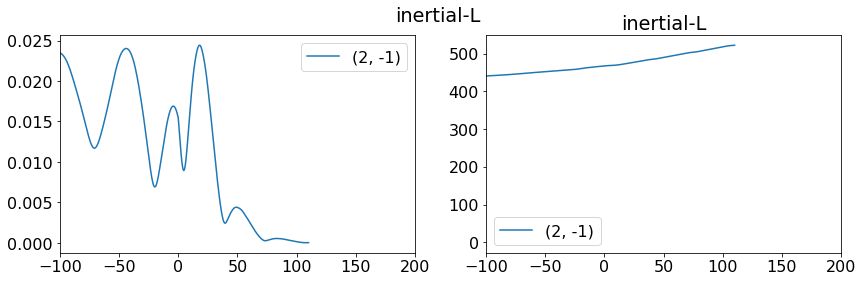

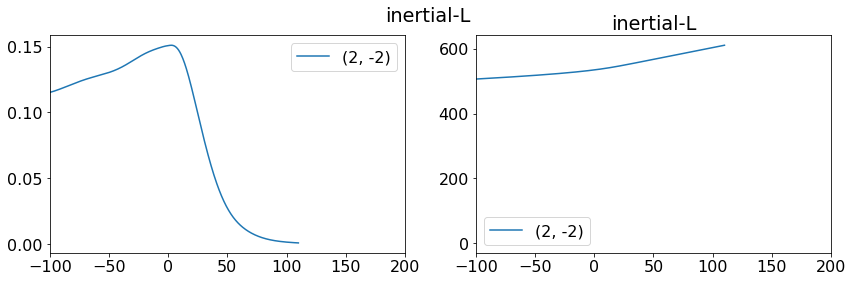

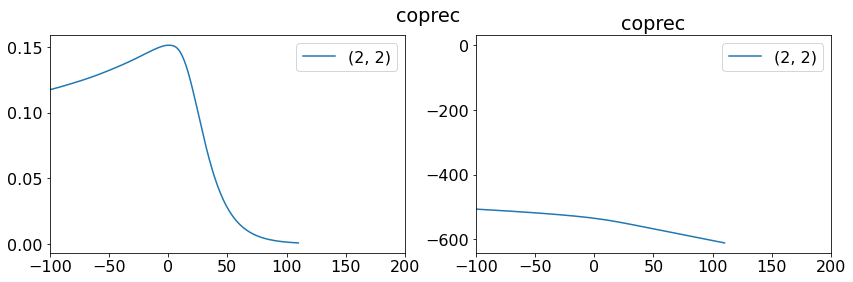

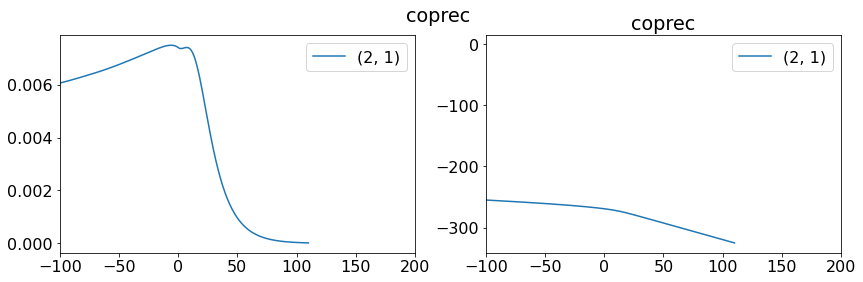

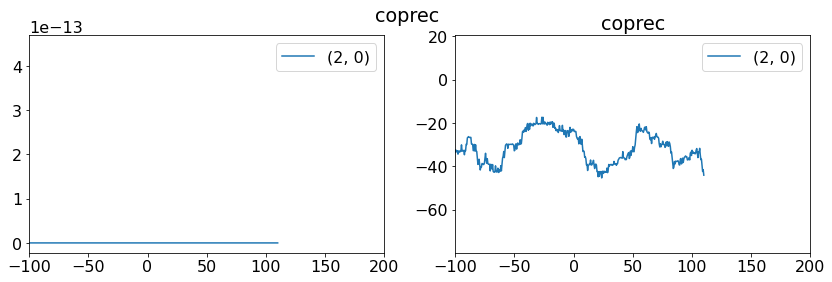

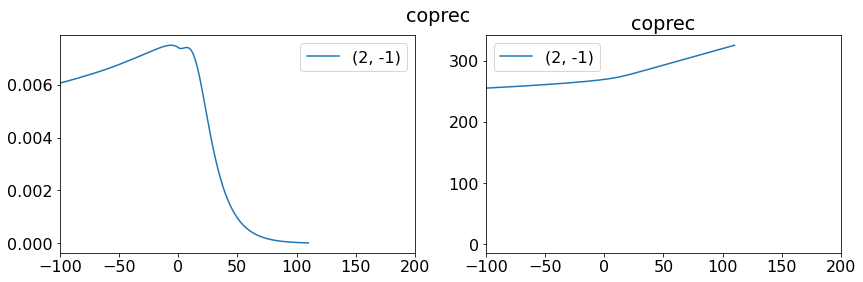

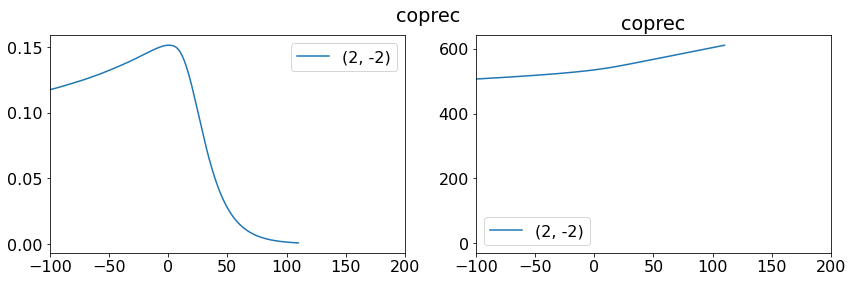

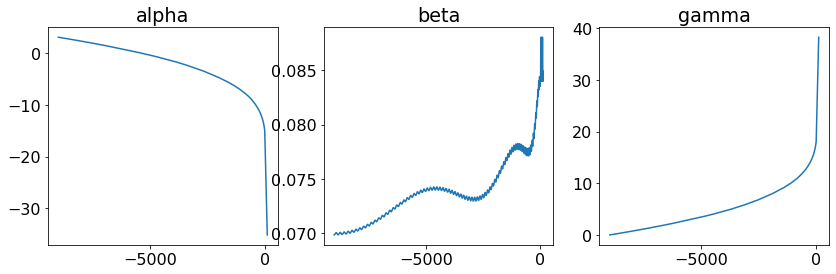

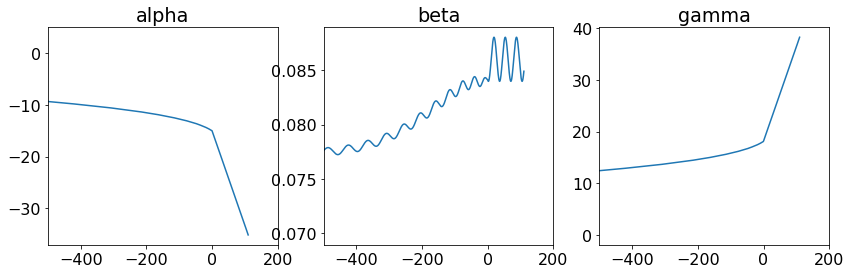

In [483]:
params = lalutils.gen_td_modes_wf_params(
    m1=m1,
    m2=m2,
    approximant=lalsim.SEOBNRv4P,
    S1x=S1x,
    S1y=S1y,
    S1z=S1z,
    S2x=S2x,
    S2y=S2y,
    S2z=S2z,
    f_min=12,
    f_ref=12,
    phiRef=1.2)

print(params)

times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=True, modes=[[2,2],[2,1]], t_min=None, t_max=110)

thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
    mass1=params['m1'], mass2=params['m2'], f_ref=params['f_min'], inc=0, phiref=params['phiRef'],
    spin1x=params['S1x'], spin1y=params['S1y'], spin1z=params['S1z'],
    spin2x=params['S2x'], spin2y=params['S2y'], spin2z=params['S2z'])
print(thetaJN, alpha0, phi_aligned)

wr = rotations.WaveformRotations(
    times=times,
    hlms=hlms, 
    frame='inertial-L',
    alpha0=alpha0,
    thetaJN=thetaJN,
    phi0=phi_aligned) 

for key in wr.hlms.keys():
    plt.figure(figsize=(14,4))
    plt.subplot(1, 2, 1)
    plt.plot(wr.times, np.abs(wr.hlms[key]), label=f'{key}')
    plt.legend()
    plt.xlim(-100,200)
    plt.subplot(1, 2, 2)
    plt.plot(wr.times, np.unwrap(np.angle(wr.hlms[key])), label=f'{key}')
    plt.legend()
    plt.title(wr.frame)
    plt.xlim(-100,200)
    plt.suptitle(wr.frame)
    plt.show()
    plt.close()

wr.from_inertial_frame_to_coprecessing_frame()

for key in wr.hlms.keys():
    plt.figure(figsize=(14,4))
    plt.subplot(1, 2, 1)
    plt.plot(wr.times, np.abs(wr.hlms[key]), label=f'{key}')
    plt.legend()
    plt.xlim(-100,200)
    plt.subplot(1, 2, 2)
    plt.plot(wr.times, np.unwrap(np.angle(wr.hlms[key])), label=f'{key}')
    plt.legend()
    plt.title(wr.frame)
    plt.xlim(-100,200)
    plt.suptitle(wr.frame)
    plt.show()
    plt.close()
    
    
plt.figure(figsize=(14,4))
plt.subplot(1, 3, 1)
plt.plot(wr.times, wr.alpha)
plt.title('alpha')

plt.subplot(1, 3, 2)
plt.plot(wr.times, wr.beta)
plt.title('beta')

plt.subplot(1, 3, 3)
plt.plot(wr.times, wr.gamma)
plt.title('gamma')
plt.show()
plt.close()

plt.figure(figsize=(14,4))
plt.subplot(1, 3, 1)
plt.plot(wr.times, wr.alpha)
plt.title('alpha')
plt.xlim(-500, 200)

plt.subplot(1, 3, 2)
plt.plot(wr.times, wr.beta)
plt.title('beta')
plt.xlim(-500, 200)

plt.subplot(1, 3, 3)
plt.plot(wr.times, wr.gamma)
plt.title('gamma')
plt.xlim(-500, 200)
plt.show()
plt.close()

## try to model beta here because it has high frequency component

In [156]:
X_train = wr.times.copy()[:,np.newaxis][::10]
y_train = wr.beta.copy()[:,np.newaxis][::10]

In [158]:
# mask = X_train > -500
# X_train = X_train[mask][:,np.newaxis]
# y_train = y_train[mask][:,np.newaxis]

In [159]:
mask

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [160]:
X_train.shape

(1837, 1)

In [161]:
y_train.shape

(1837, 1)

In [162]:
import sklearn.preprocessing

In [163]:
times_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,0))

In [164]:
X_train = times_scaler.fit_transform(X_train)

In [165]:
X_train.shape

(1837, 1)

In [166]:
y_train.shape

(1837, 1)

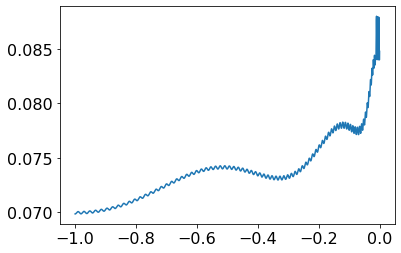

In [167]:
plt.figure()
plt.plot(X_train, y_train)

In [168]:
import tensorflow as tf
import wispy.mscalev5

In [169]:
import pugna.activations

In [170]:
from tensorflow.keras.utils import get_custom_objects
get_custom_objects().update({'s2relu': pugna.activations.s2relu})

In [174]:
# model_params=dict(
#     input_shape=1,
#     output_shape=1,
#     units=[128,128,128,128],
#     activation='relu',
#     scale_activation='s2relu',
#     n_blocks=[1,1,1,1],
#     scales=[1,10,50,100],
#     layers_per_block=3,
#     scale_dimension=0,
#     dtype=None,
#     skip_connection=False,
#     skip_connection_dense=False,
#     final_dense=False,
# )

model_params=dict(
    input_shape=1,
    output_shape=1,
    units=[128,128,128],
    activation='relu',
    scale_activation='s2relu',
    n_blocks=[1,1,1],
    scales=[1,10,50],
    layers_per_block=3,
    scale_dimension=0,
    dtype=None,
    skip_connection=False,
    skip_connection_dense=False,
    final_dense=False,
)

In [181]:
model = wispy.mscalev5.build_model(**model_params)

In [182]:
model.compile(optimizer='adam', loss='mse')

In [188]:
%%time
history = model.fit(X_train, y_train, epochs=2000, batch_size=X_train.shape[0])

Epoch 1/1000
1/1 [==============================] - 0s 31ms/step - loss: 5.5052e-07
Epoch 2/1000
1/1 [==============================] - 0s 25ms/step - loss: 9.6989e-07
Epoch 3/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.7321e-06
Epoch 4/1000
1/1 [==============================] - 0s 59ms/step - loss: 3.0186e-06
Epoch 5/1000
1/1 [==============================] - 0s 25ms/step - loss: 5.2369e-06
Epoch 6/1000
1/1 [==============================] - 0s 20ms/step - loss: 8.5210e-06
Epoch 7/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.3226e-05
Epoch 8/1000
1/1 [==============================] - 0s 18ms/step - loss: 1.7800e-05
Epoch 9/1000
1/1 [==============================] - 0s 17ms/step - loss: 2.0861e-05
Epoch 10/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.8135e-05
Epoch 11/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.0657e-05
Epoch 12/1000
1/1 [==============================] - 0s 17ms/step - loss: 

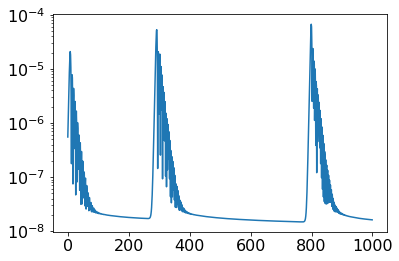

In [189]:
plt.figure()
plt.plot(history.history['loss'])
plt.yscale('log')

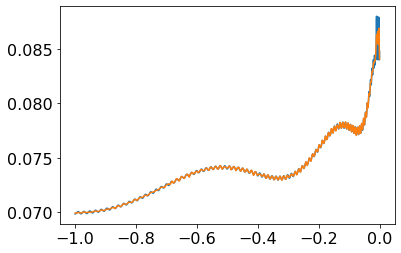

In [191]:
plt.figure()
plt.plot(X_train, y_train)
plt.plot(X_train, model.predict(X_train))
# plt.xlim(-0.1, 0.1)

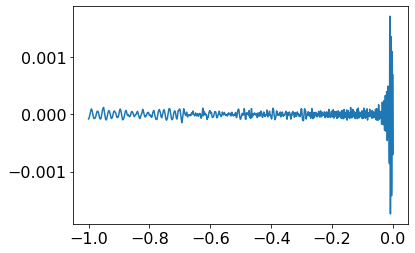

In [192]:
plt.figure()
plt.plot(X_train, y_train-model.predict(X_train))

# look at phase of 22 and 21 in coprec frame

In [432]:
m1, m2 = phenom.m1_m2_M_q(100, 4)

params = lalutils.gen_td_modes_wf_params(
    m1=m1,
    m2=m2,
    approximant=lalsim.SEOBNRv4P,
    S1x=0.1,
    S1y=0.,
    S1z=0.9,
    S2x=0.4,
    S2y=0.,
    S2z=0.8,
    f_min=12,
    f_ref=12,
    phiRef=0.)

print(params)

times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=True, modes=[[2,2],[2,1]], t_min=None, t_max=110)

thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
    mass1=params['m1'], mass2=params['m2'], f_ref=params['f_min'], inc=0, phiref=params['phiRef'],
    spin1x=params['S1x'], spin1y=params['S1y'], spin1z=params['S1z'],
    spin2x=params['S2x'], spin2y=params['S2y'], spin2z=params['S2z'])
print(thetaJN, alpha0, phi_aligned)

wr = rotations.WaveformRotations(
    times=times,
    hlms=hlms, 
    frame='inertial-L',
    alpha0=alpha0,
    thetaJN=thetaJN,
    phi0=phi_aligned) 


{'m1': 80.0, 'm2': 20.0, 'S1x': 0.1, 'S1y': 0.0, 'S1z': 0.9, 'S2x': 0.4, 'S2y': 0.0, 'S2z': 0.8, 'phiRef': 0.0, 'r': 1, 'deltaT': 0.000244140625, 'f_min': 12, 'f_ref': 12, 'LALpars': None, 'lmax': 2, 'approximant': 51}
0.062138203211469324 1.2246467991473532e-16 -0.0


In [433]:
wr.from_inertial_frame_to_coprecessing_frame()

In [434]:
phase_22 = np.unwrap(np.angle(wr.hlms[(2,2)]))
phase_21 = np.unwrap(np.angle(wr.hlms[(2,1)]))


phi22_0 = phase_22[0]

# phase_22 -= phi22_0
# phase_21 -= phi22_0


# phase_22 = np.angle(wr.hlms[(2,2)])
# phase_21 = np.angle(wr.hlms[(2,1)])

# phase_2m2 = np.angle(wr.hlms[(2,-2)])
# phase_2m1 = np.angle(wr.hlms[(2,-1)])

In [435]:
phase_22[0]

-0.6299245723575668

In [436]:
phase_21[0]

-1.9138105810031525

In [437]:
phase_22[0] - phase_21[0]

1.2838860086455857

In [438]:
phase_22[0]*(1/2)

-0.3149622861787834

In [439]:
phase_21[0]

-1.9138105810031525

In [440]:
phase_22[0] - (phase_21[0] + np.pi/2)

-0.2869103181493109

In [441]:
(phase_22[0]/2) - (phase_21[0] + np.pi/2)

0.028051968029472518

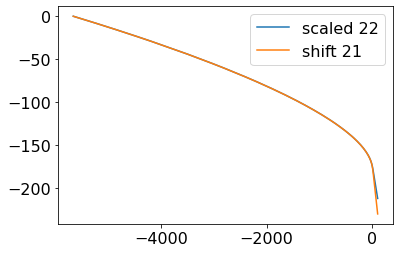

In [442]:
plt.figure()
plt.plot(wr.times, phase_22*(1/2), label='scaled 22')
plt.plot(wr.times, phase_21 + np.pi/2, label='shift 21')
# plt.xlim(-4000, -3000)
# plt.ylim(-10,1)
# plt.xlim(-100,100)
plt.legend()

(-1.0, 1.0)

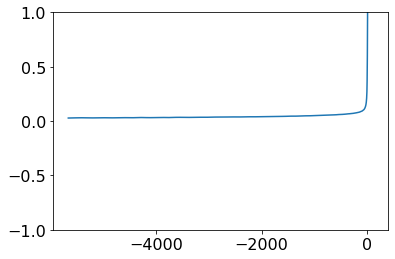

In [443]:
plt.figure()
plt.plot(wr.times, (phase_22*(1/2)) - (phase_21 + np.pi/2))
plt.ylim(-1,1)

## look at oribtal phase derived from 2,2 and 2,-2 coprec frame

In [444]:
# eq 3 https://arxiv.org/pdf/1905.09300.pdf

In [445]:
wr.frame

'coprec'

In [446]:
def orb_phase_from_coprec(wr):
    phase_22 = np.unwrap(np.angle(wr.hlms[(2,2)]))
    phase_2m2 = np.unwrap(np.angle(wr.hlms[(2,-2)]))
    
    orb_phase = (phase_2m2 - phase_22)/4
    return orb_phase

In [447]:
orb_phase = orb_phase_from_coprec(wr)

In [448]:
# for this cases the 2,2 and the 2,-2 are related by complex conguation
# but in the NR cases there will be a difference which is the mode asymmetry

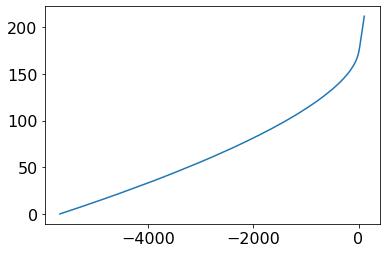

In [449]:
plt.figure()
plt.plot(wr.times, orb_phase)

In [ ]:
# see equations 13 in https://arxiv.org/pdf/2012.11923.pdf
# for phase shifts

In [450]:
def compute_coorb_modes(wr):
    orb_phase = orb_phase_from_coprec(wr)
    
    hlms_coorb = {}
    for key in wr.hlms.keys():
        m = key[1]
        if np.abs(m) == 1:
            print("SD")
            hlms_coorb[key] = wr.hlms[key] * np.exp(1.j * m * (orb_phase + np.pi/2))
        else:
            hlms_coorb[key] = wr.hlms[key] * np.exp(1.j * m * orb_phase)
        
    return hlms_coorb

In [451]:
hlms_coorb = compute_coorb_modes(wr)

SD
SD


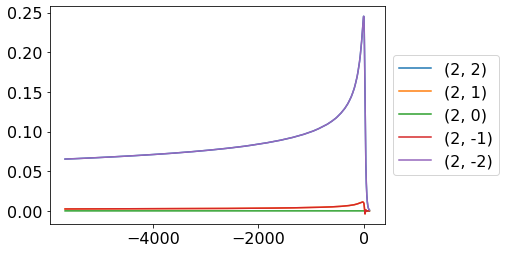

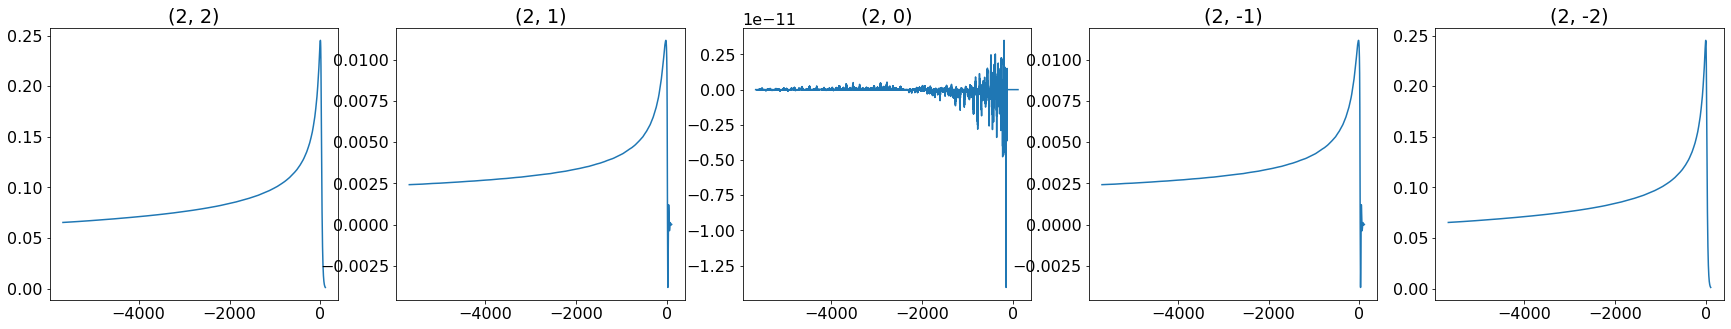

In [452]:
plt.figure()
for key in hlms_coorb.keys():
    plt.plot(wr.times, np.real(hlms_coorb[key]), label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.figure(figsize=(30,5))
for i, key in enumerate(hlms_coorb.keys()):
    plt.subplot(1, 5, i+1)
    plt.plot(wr.times, np.real(hlms_coorb[key]))
    plt.title(key)

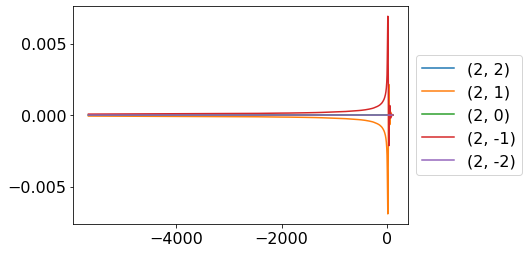

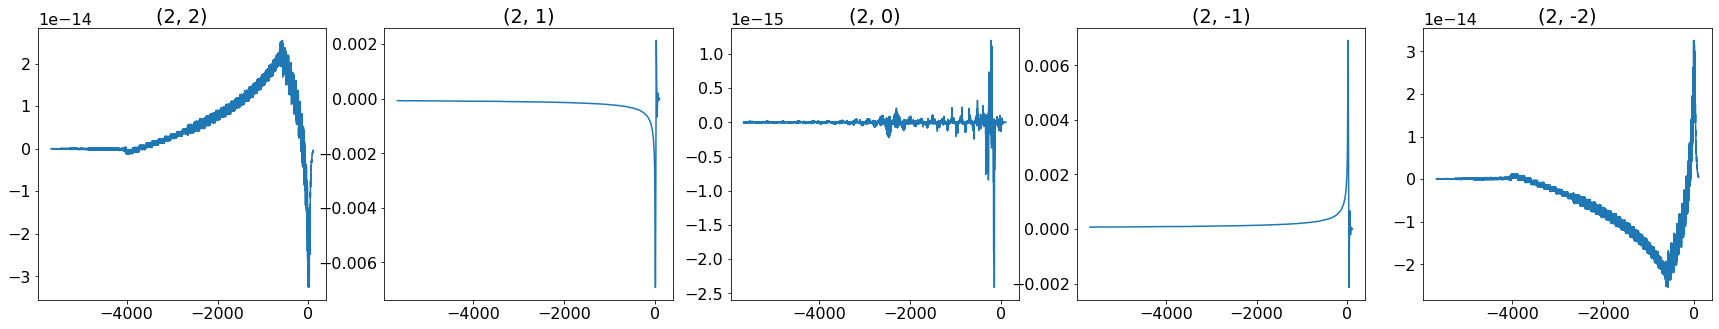

In [453]:
plt.figure()
for key in hlms_coorb.keys():
    plt.plot(wr.times, np.imag(hlms_coorb[key]), label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(30,5))
for i, key in enumerate(hlms_coorb.keys()):
    plt.subplot(1, 5, i+1)
    plt.plot(wr.times, np.imag(hlms_coorb[key]))
    plt.title(key)

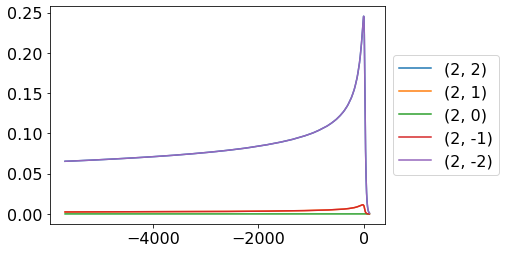

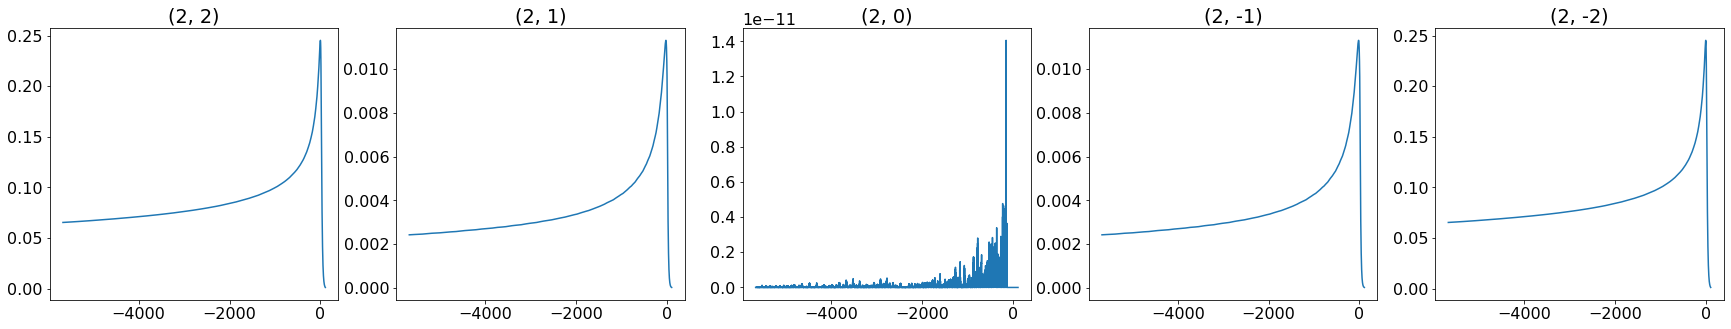

In [454]:
plt.figure()
for key in hlms_coorb.keys():
    plt.plot(wr.times, np.abs(hlms_coorb[key]), label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(30,5))
for i, key in enumerate(hlms_coorb.keys()):
    plt.subplot(1, 5, i+1)
    plt.plot(wr.times, np.abs(hlms_coorb[key]))
    plt.title(key)

0 -5.310359315293496e-17
1 -0.02805196802947254
2 -1.5781491354615875
3 0.028051968029542042
4 1.593107794588049e-16


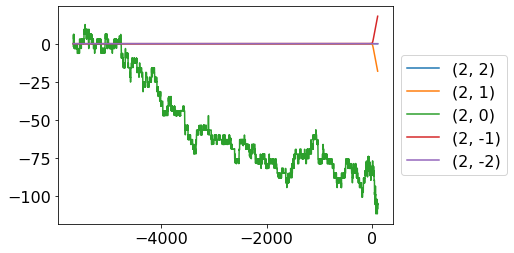

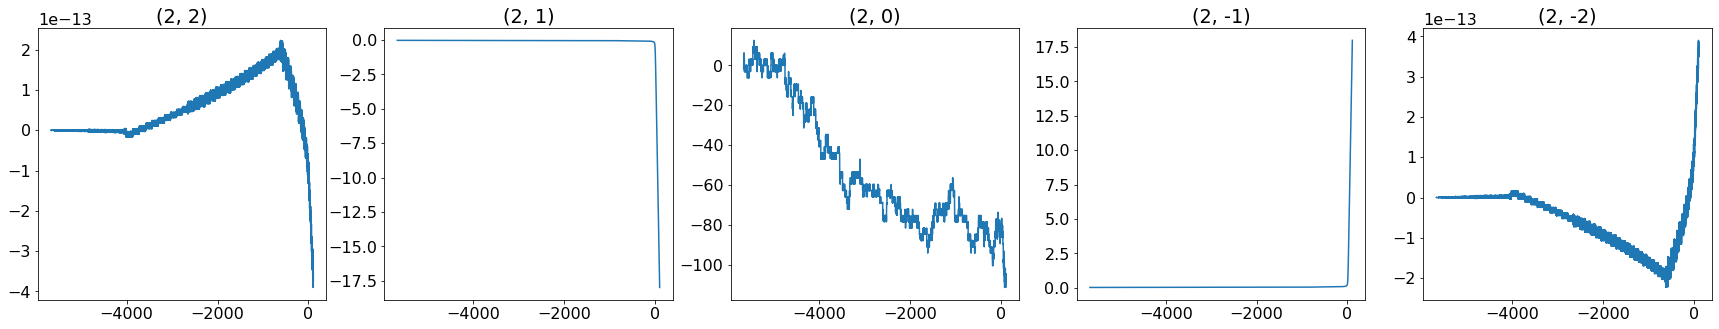

In [455]:
plt.figure()
for key in hlms_coorb.keys():
    plt.plot(wr.times, np.unwrap(np.angle(hlms_coorb[key])), label=key)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(30,5))
for i, key in enumerate(hlms_coorb.keys()):
    plt.subplot(1, 5, i+1)
    print(i, np.unwrap(np.angle(hlms_coorb[key]))[0])
    plt.plot(wr.times, np.unwrap(np.angle(hlms_coorb[key])))
    plt.title(key)